<div style="direction:rtl">
#### שמות המגישים: סשה ושאול
</div>

<div style="direction:rtl"><h1>
# מעבדה 3 - כיול מצלמה  - בניית נתונים
</h></div>

<div style="direction:rtl">
עד כה יצרנו תצלומים באמצעות מצלמות אידאליות, שם הנקודה הראשית נמצאת בדיוק בראשית הצירים של מערכת התצלום.

על מנת שנוכל לבדוק מודלים של כיול של מצלמה, עלינו להכניס הזזה של הנקודה הראשית ועיוותי עדשה.

<div style="direction:rtl"><h2>
### חלק 1 - הנקודה הראשית

<div style="direction:rtl">
1.	כתבו פונקציה המייצרת נקודות במערכת התצלום כאשר הנקודה הראשית מוזזת מראשית הצירים.
      - *הוסיפו את הפונקציה למחלקה המתאימה*    

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Camera
import SingleImage as sg

In [9]:
f = 35 # in milimeters
sensor_size = 25 # in milimeters
ppa = np.array([0.1,0.2]) # Principal point delta

cam1 = Camera.Camera(f, None, None, None, None, sensor_size)
img1 = sg.SingleImage(cam1)

n=5
x_img_o, y_img_o = img1.GeneratePointsImg(n, np.array([0,0])) # Points without shift
x_img, y_img = img1.GeneratePointsImg(n, ppa) # points with shift

def plotgrid(x_img,y_img, ax):
    # Plotting grid of points
    ax.scatter(x_img,y_img)
    for i in range(x_img.shape[0]):
        for j in range(x_img.shape[1]):
            ax.annotate('('+str(np.round(x_img[i,j],2))+','+str(np.round(y_img[i,j],2))+')', \
                        (x_img[i,j], y_img[i,j]), size=8)

<div style="direction:rtl">
2.	נגדיר את מיקום הנקודה הראשית xp=100; yp=200 מיקרון. כיצד ישתנו ערכי הנקודות במערכת התצלום. הסבירו איזה ערכים אתם צופים לקבל. באיזו סוג התמרה השתמשתם?

<div style="direction:rtl"><b>
כל הנקודות יזוזו במינוס ערך התיקון
כאשר מדובר על התמרה אוקלידית ללא סיבוב

$$\begin{aligned}&\bar{x}=x-x_{p}\\&\bar{y}=y-y_{p}\end{aligned}$$

<div style="direction:rtl">
3.	הראו שהפונקציה מחזירה את הערכים שלהם ציפיתם. 

ללא עיוות
עם עיוות


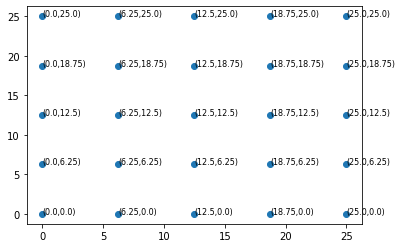

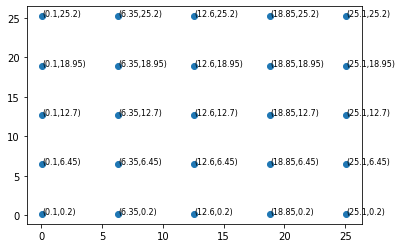

In [10]:

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()

print('ללא עיוות')
plotgrid(x_img_o,y_img_o, ax)
print('עם עיוות')
plotgrid(x_img,y_img, ax2)

<div style="direction:rtl"><b>
אנו מקבלים נקודות עם עיוות מכוון בסדר גודל שהגדרנו (הזזה)

<div style="direction:rtl">
4.	כתבו פונקציה המתקנת את הנקודות בהינתן ערכי הנקודה הראשית אל מערכת המצלמה.
      - *הוסיפו את הפונקציה למחלקה המתאימה*    

In [11]:
y_v = y_img.reshape((y_img.shape[0]*y_img_o.shape[1],1)) # turning into vector
x_v = x_img.reshape((x_img.shape[0]*x_img_o.shape[1],1)) # turning into vector
principal_point = np.array([0.1,0.2])
camera_points = np.concatenate((x_v-sensor_size/2,-1*(y_v-sensor_size/2),f*np.ones((len(x_v),1))),axis=1)


def CorrectionToPrincipalPoint(camera_points):
    """
    Correcting camera points
    :param camera_points: np.ndarray (n,3)
    :return: np.ndarray (n,3)
    """
    camera_points[:,0] = camera_points[:,0]-principal_point[0]
    camera_points[:,1] = camera_points[:,1]-principal_point[1]
    return camera_points

<div style="direction:rtl">
5.	הראו כי פתרון התצלום לאחר התיקון מוביל לערכים צפויים. 

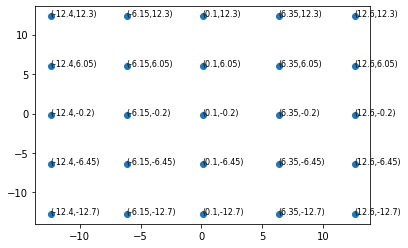

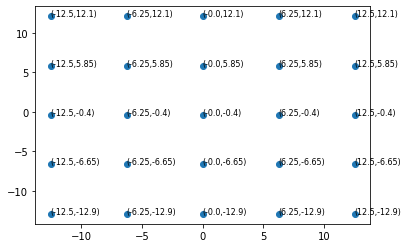

In [12]:
fig3, ax3 = plt.subplots()
plotgrid(camera_points[:,0].reshape((n,n)), \
         camera_points[:,1].reshape((n,n)), ax3)

camera_points_ppa_fixed = CorrectionToPrincipalPoint(camera_points)

fig4, ax4 = plt.subplots()
plotgrid(camera_points_ppa_fixed[:,0].reshape((n,n)), \
         camera_points_ppa_fixed[:,1].reshape((n,n)), ax4)

<div style="direction:rtl"><b>
הכן ניתן לראות כי התבצע תיקון במערכת המצלמה
(לנקודות יש שלושה ערכים)

<div style="direction:rtl"><h2>
### חלק 2 - עיוותים רדיאליים

<div style="direction:rtl">
6.	השתמשו במודל של העיוותים הרדיאליים שניתנה בהרצאה. מה יהיו ערכי K1  ו-K2 כך שהעיוות המקסימלי בתמונה לא יעלה על 50 מיקרון והעיוות הנתרם על ידי K2 לא יעלה על 10 מיקרון. ניתן להניח ש-K3=0.  

<div style="direction:rtl"><b>
תנאי סף

$$
\begin{cases}
	\Delta \mathrm{r}=\mathrm{k}_1\mathrm{r}_{\mathrm{i}}^{3}+\mathrm{k}_2\mathrm{r}_{\mathrm{i}}^{5}\\
	\mathrm{r}_{\mathrm{i}}=\sqrt{\mathrm{x}_{\mathrm{i}}^{2}+\mathrm{y}_{\mathrm{i}}^{2}}\\
\end{cases}
\\
\begin{cases}
	\mathrm{r}_{\mathrm{i},\max}=\sqrt{\mathrm{x}_{\mathrm{i},\max}^{2}+\mathrm{y}_{\mathrm{i},\max}^{2}}\rightarrow \mathrm{Farest} \mathrm{point}\\
	\mathrm{k}_2\mathrm{r}_{\mathrm{i},\max}^{5}=10\cdot 10^{-6}_{\left( \mathrm{m} \right)}\\
	\mathrm{k}_1\mathrm{r}_{\mathrm{i},\max}^{3}+\mathrm{k}_2\mathrm{r}_{\mathrm{i},\max}^{5}=50\cdot 10^{-6}_{\left( \mathrm{m} \right)}\\
\end{cases}
$$

In [135]:
def r(x,y):
    # simple distance
    return np.sqrt(x**2+y**2)

grid = 20
range_extend = 2.0 # Extending tha range of parameters
r_max = r(sensor_size*1000,sensor_size*1000) # in microns
r_range = np.linspace(0,r_max, grid)
k2_max = 10.0/r_max**5 # in microns
k2_range = np.linspace(0,k2_max, grid)
k1_max = 40.0/r_max**3 # in microns
k1_range = np.linspace(0,k1_max, grid)

<div style="direction:rtl"><b>
הערכים

In [137]:
print('r=',r_max*0.001,'mm','\nK1=',k1_max,'\nK2=',k2_max)

r= 35.35533905932738 mm 
K1= 9.050966799187806e-13 
K2= 1.8101933598375606e-22


In [151]:
# Creating 3d plot of radial distortion fix dependet on k1,k2,r
points = []
color = None
for ri in range(grid):
    for k2 in range(grid):
        for k1 in range(grid):
            delta = k1_range[k1]*r_range[ri]**3+k2_range[k2]*r_range[ri]**5
            if delta >= 0 and delta <10:
                color = (0.0,1.0,1.0,float(delta/50))
            elif delta > 10 and delta <20:
                color = (0.0,1.0,0.0,float(delta/50))
            elif delta > 20 and delta <30:
                color = (1.0,1.0,0.0,float(delta/50))
            elif delta > 30 and delta <40:
                color = (1.0,0.64,0.0,float(delta/50))
            elif delta > 40 and delta <=50:
                color = (1.0,0.0,0.0,float(delta/50))
            points.append([k1_range[k1],k2_range[k2],r_range[ri],color])
points = np.array(points)
#print(pd.DataFrame(points))

<div style="direction:rtl">
7.	הסתמכו על מודל העיוותים ועל K1 ו-K2 שמצאתם בסעיף הקודם, ובנו גרף המתאר את גודל העיוות הרדיאלי כתלות במרחק מהנקודה הראשית.

<div style="direction:rtl"><b>
גודל העיוות (צבע) כתלות בK1 K2 R

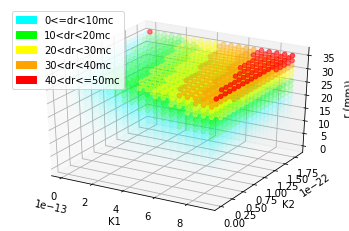

In [152]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.patches as mpatches

fig = plt.figure(facecolor=(1, 1, 1))
ax = plt.axes(projection="3d")


x = list(points[:,0])
y = list(points[:,1])
z = list(points[:,2]*0.001)
colors = list(points[:,3])

ax.scatter3D(x, y, z, color=colors)
ax.set_xlabel('K1')
ax.set_ylabel('K2')
ax.set_zlabel('r (mm))')
c1 = mpatches.Patch(color=(0.0,1.0,1.0,1.0), label='0<=dr<10mc')
c2 = mpatches.Patch(color=(0.0,1.0,0.0,1.0), label='10<dr<20mc')
c3 = mpatches.Patch(color=(1.0,1.0,0.0,1.0), label='20<dr<30mc')
c4 = mpatches.Patch(color=(1.0,0.64,0.0,1.0), label='30<dr<40mc')
c5 = mpatches.Patch(color=(1.0,0.0,0.0,1.0), label='40<dr<=50mc')
plt.legend(handles=[c1,c2,c3,c4,c5],loc='upper left')
plt.show()



<div style="direction:rtl"><b>
גודל העיוות כתלות בR

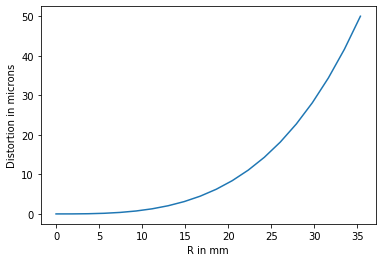

In [153]:
fig2 = plt.figure()
ax2 = plt.axes()
points = []
for ri in range(grid):
            delta = k1_max*r_range[ri]**3+k2_max*r_range[ri]**5
            points.append([r_range[ri],delta])
points = np.array(points)
ax2.plot(points[:,0]/1000,points[:,1])
ax2.set_xlabel('R in mm')
ax2.set_ylabel('Distortion in microns')

fig2.show()

<div style="direction:rtl">
8.	כתבו פונקציה המוסיפה את העיוותים הרדיאליים (K1  ו-K2 ) של העדשה לנקודות במערכת התצלום.
      - *הוסיפו את הפונקציה למחלקה המתאימה*    

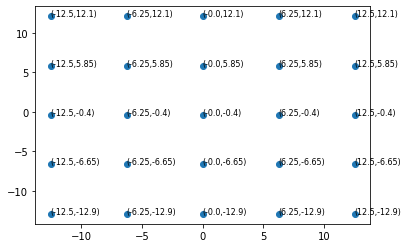

In [159]:
def CorrectionToRadialDistortions(camera_points):
    """
    Fixing Radial distorinon on camera points
    :param camera_points: camera points
    :return: fixed camera points
    """
    angle = np.arctan2(camera_points[:,1],camera_points[:,0]) # angle for each point
    range = np.sqrt(camera_points[:,1]**2+camera_points[:,0]**2) # range from center each point
    # distortion = self.radial_distortions[0]*range**3+self.radial_distortions[1]*range**5
    distortion = radial_distortions[0]*range**3+radial_distortions[1]*range**5 # distortion size
    camera_points[:,0] = camera_points[:,0] - distortion*np.cos(angle) # fix for x
    camera_points[:,1] = camera_points[:,1] - distortion*np.sin(angle) # fix for y
    return camera_points

radial_distortions = np.array([k1_max,k2_max]) # instead of self var


camera_points_ppa_rad_fixed = CorrectionToRadialDistortions(camera_points_ppa_fixed)

fig4, ax4 = plt.subplots()
plotgrid(camera_points_ppa_rad_fixed[:,0].reshape((n,n)), \
         camera_points_ppa_rad_fixed[:,1].reshape((n,n)), ax4)

<div style="direction:rtl"><b>
התיקון קטן לא ניתן להבחין על גרף

<div style="direction:rtl">
9.	השתמשו בערכי K1 ו-K2 שמצאתם בסעיף 6. הראו כיצד ישפיע מיקום שונה של הנקודה הראשית על גודל העיוות המדידות. 

<div style="direction:rtl"><b>
כיוון שמדובר בהזזה אנו נקבל כי הוספת וקטור
נקבל הזזה של גרף המקבל בשאלה 10



<div style="direction:rtl">
10.	שרטטו את העיוותים. השתמשו ב- ()plt.quiver.

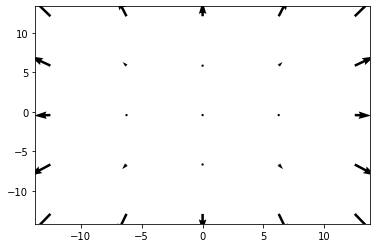

In [167]:
def CalculateRadialDistortions(camera_points):
    """
    Calculating Radial distorinon on camera points
    :param camera_points: camera points
    :return: fixed camera points
    """
    distortion_xy = np.zeros((camera_points.shape[0],2))
    angle = np.arctan2(camera_points[:,1],camera_points[:,0]) # angle for each point
    range = np.sqrt(camera_points[:,1]**2+camera_points[:,0]**2) # range from center each point
    # distortion = self.radial_distortions[0]*range**3+self.radial_distortions[1]*range**5
    distortion = radial_distortions[0]*range**3+radial_distortions[1]*range**5 # distortion size
    distortion_xy[:,0] = distortion*np.cos(angle) # fix for x
    distortion_xy[:,1] = distortion*np.sin(angle) # fix for y
    return distortion_xy

radial_distortions = np.array([k1_max,k2_max]) # instead of self var
radial_distortions_xy = CalculateRadialDistortions(camera_points_ppa_fixed)

import matplotlib.pyplot as plt
fig6, ax6 = plt.subplots()
q = ax6.quiver(camera_points_ppa_fixed[:,0], \
              camera_points_ppa_fixed[:,1], \
              radial_distortions_xy[:,0], \
              radial_distortions_xy[:,1])
ax6.quiverkey(q, X=0.3, Y=1.1, U=10, label='Quiver key, length = 10', labelpos='E')

<div style="direction:rtl">
11.	האם גודל העיוות הרדיאלי תלוי בפיזור נקודות הבקרה? נמקו.

<div style="direction:rtl"><b>
כן, כיוון שאם נמקם את כל הנקודות במרכז הפרספקטיבי
אנו נתקשה לתאם את המקדמים של העיוות זאז שמרבית השפעתם מקבלים
ככל שמתרחקים מהמרכז הפרספקטיבי.



<div style="direction:rtl">
12.	האם גודל העיוות הרדיאלי תלוי באוריינטציית התצלום? נמקו.

<div style="direction:rtl"><b>
כן, אם מישור התצלום (חיישן) אינו מקביל מישור העדשה אנו נקבל עיוות משיקי


